# ISLP - Chapter 3 - Exercise 14
### Author: pzuehlke

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

__14 (a):__ The form of the linear model is
$$
    Y = 2 + 2 X_1 + 0.3 X_2 + \varepsilon
$$
where $ \text{Var}(\varepsilon) = 1 $. The regression coefficients are thus:
$$
    \beta_0 = 2\,, \quad \beta_1 = 2\,, \quad \beta_2 = 0.3\,.
$$

In [35]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

__14 (b):__ Per the calculations below, their correlation is $ r = 0.7723 $.

The correlation is: 0.7723


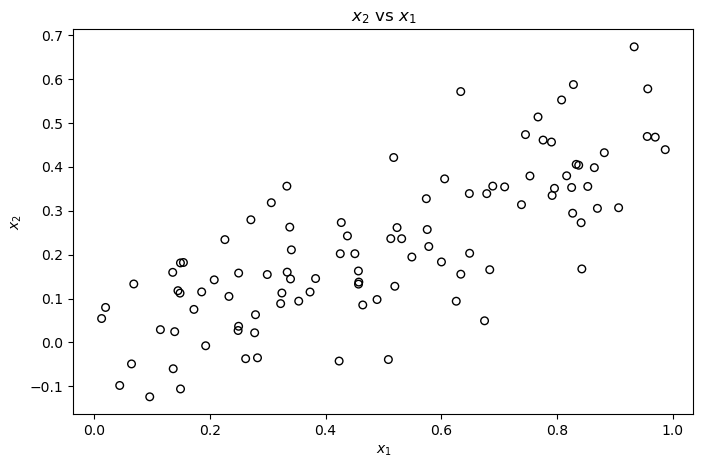

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x1, x2, color="black", facecolor="none", s=30);
ax.set_xlabel("$ x_1 $")
ax.set_ylabel("$ x_2 $")
ax.set_title("$ x_2 $ vs $ x_1 $")

corr_matrix = np.corrcoef(x1, x2)
r = corr_matrix[0, 1]
print(f"The correlation is: {r:.4f}")

__14 (c):__ Using the code given below, we find that
$$
\hat{\beta}_0 = 1.9579\,, \quad \hat{\beta}_1 = 1.6154\,, \quad \hat{\beta}_2 = 0.9428\,.
$$
Note that while $ \hat{\beta}_0 $ is close to the correct value of $ 2 $, the
estimates for $ \beta_1 $ and $ \beta_2 $ are poor. Moreover, we can reject the
null hypothesis that $ \beta_1 = 0 $, but not the hypothesis that $ \beta_2 = 0
$, even though its true value is $ 0.3 $.

In [37]:
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
model_x1_x2 = sm.OLS(y, X).fit()
model_x1_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           5.76e-08
Time:                        18:55:02   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__14 (d):__ Using the code below we obtain the estimates
$$
    \hat{\beta}_0 = 1.9371\,, \quad \hat{\beta}_1 = 2.0771\,.
$$
We can reject the hypothesis that $ \beta_1 = 0 $ since the associated $ p
$-value is very close to $ 0 $. The estimate for $ \beta_0 $ is worse than in
the first model, but not terrible. The same holds for the estimate for $ \beta_1
$, if we take into account that in the true model, the coefficient of $ x_2 $ is
$ 0.3 $ and that $ x_2 = 0.5\,x_1 + \text{normal error} $, so that we should
expect $ \hat{\beta}_1 \approx 2.15 $.  The adjusted $ R^2 $ is essentially the
same as for the original model.

In [38]:
X = sm.add_constant(x1)
model_x1 = sm.OLS(y, X).fit()
model_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.37e-08
Time:                        18:55:03   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__14 (e):__ Using the code below we obtain the estimates
$$
    \hat{\beta}_0 = 2.3239\,, \quad \hat{\beta}_2 = 2.9103\,.
$$
Both estimates are very poor. We can reject the hypothesis that $ \beta_2 = 0 $
since the associated $ p $-value is very close to $ 0 $. This model is
substantially worse than the one involving only $ x_1 $, since it has a lower $
R^2 $.

In [39]:
X = sm.add_constant(x2)
model_x2 = sm.OLS(y, X).fit()
model_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           7.43e-07
Time:                        18:55:04   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x1             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__14 (f):__  The fact that $ x_1 $ and $ x_2 $ have very high correlation helps
to explain why in the full model including both variables the $ p $-value associated to
$ x_2 $ is high, while in each of the models including only one of these
variables the $ p $-values associated to the linear term is essentially zero.

__14 (g):__

In [40]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
print(x1.shape[0])

# Fitting the model:
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
new_model = sm.OLS(y, X).fit()
new_model.summary()

101


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           4.60e-08
Time:                        18:55:06   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(np.argsort(new_model.resid)[-10:])
print(np.argmax(new_model.resid), np.max(new_model.resid))

[ 19  86  52  39  75  55   5  32 100  99]
99 2.3072608468523814


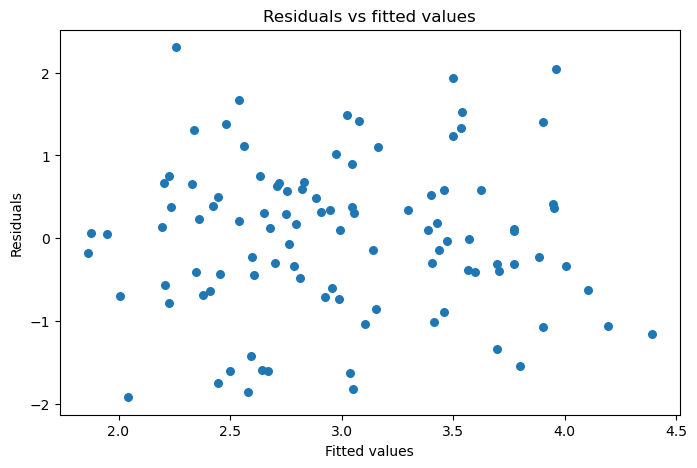

In [64]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(new_model.fittedvalues, new_model.resid, s=30)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs fitted values");

We see that the new observation (whose index is $ 100 $) has the second highest residual among all points.
Still, from the scatterplot, we see that it can't really be classified as an outlier in this respect since
there are several other observations with comparable residuals.

In [58]:
n = x1.shape[0]
p = 2
leverage_threshold = 2 * (p + 1) / n

influence = new_model.get_influence()
print(np.argsort(influence.hat_matrix_diag)[-10:])
print(np.argmax(influence.hat_matrix_diag), np.max(influence.hat_matrix_diag))

[ 92  89   2   9  78  74  54  84  15 100]
100 0.34767161961426657


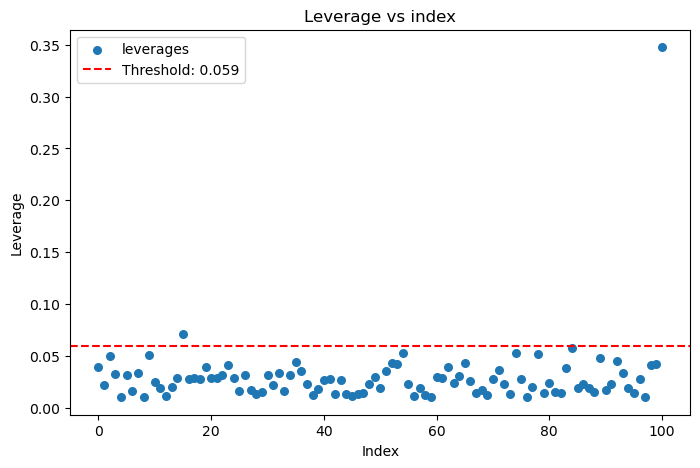

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(np.arange(x1.shape[0]), influence.hat_matrix_diag, s=30, label="leverages")
plt.axhline(y=leverage_threshold, color="r", linestyle="--",
            label=f"Threshold: {leverage_threshold:.3f}")
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
ax.legend()
ax.set_title("Leverage vs index");

The preceding output shows that the new observation (having index $ 100 $) is the
point with highest leverage, and it is a clear outlier in this respect.  This
helps to explain why the regression coefficients changed when it was added to the model.